In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
df = pd.read_csv('supermarket_sales new.csv')

In [282]:
df

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [286]:
df.sample(10)

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
400,Female,257-60-7754,A,Yangon,Normal,Electronic accessories,50.23,4,10.0460
169,Female,272-27-9238,C,Naypyitaw,Normal,Food and beverages,41.24,4,8.2480
367,Female,585-86-8361,A,Yangon,Normal,Food and beverages,27.28,5,6.8200
916,Male,538-22-0304,C,Naypyitaw,Normal,Electronic accessories,64.95,10,32.4750
626,Male,157-13-5295,A,Yangon,Member,Health and beauty,51.94,10,25.9700
7,Female,365-64-0515,A,Yangon,Normal,Electronic accessories,46.95,5,11.7375
129,Female,490-29-1201,A,Yangon,Normal,Sports and travel,15.34,1,767.0000
889,Male,388-76-2555,B,Mandalay,Normal,Sports and travel,13.69,6,4.1070
981,Male,195-06-0432,A,Yangon,Member,Home and lifestyle,81.01,3,12.1515
660,Male,727-75-6477,C,Naypyitaw,Normal,Electronic accessories,28.84,4,5.7680


In [288]:
df.isnull().sum()

Gender           0
Invoice ID       0
Branch           0
City             0
Customer type    0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
dtype: int64

In [290]:
df.duplicated().sum()

0

# EDA

In [293]:
df["Gender"].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [295]:
df.drop(columns=['Invoice ID'],inplace=True)

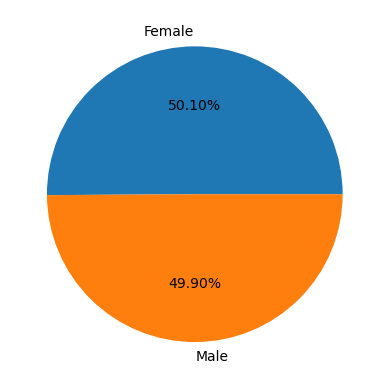

In [297]:
plt.pie(df["Gender"].value_counts(),autopct="%0.2f%%",labels=['Female','Male'])
plt.show()

In [299]:
df["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

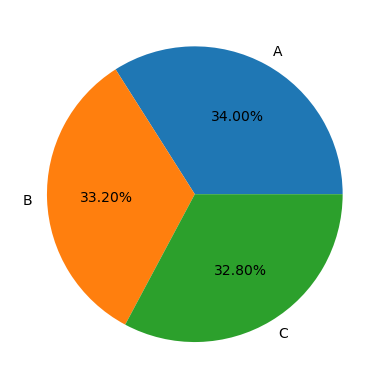

In [301]:
plt.pie(df["Branch"].value_counts(),autopct="%0.2f%%",labels=['A','B','C'])
plt.show()

In [303]:
df["City"].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

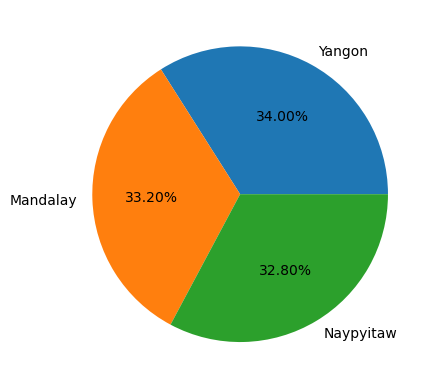

In [305]:
plt.pie(df["City"].value_counts(),autopct="%0.2f%%",labels=['Yangon','Mandalay','Naypyitaw'])
plt.show()

In [307]:
df["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

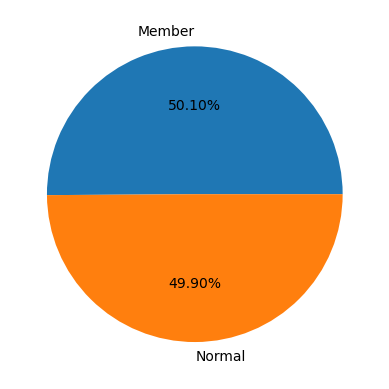

In [309]:
plt.pie(df["Customer type"].value_counts(),autopct="%0.2f%%",labels=['Member','Normal'])
plt.show()

In [311]:
df["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

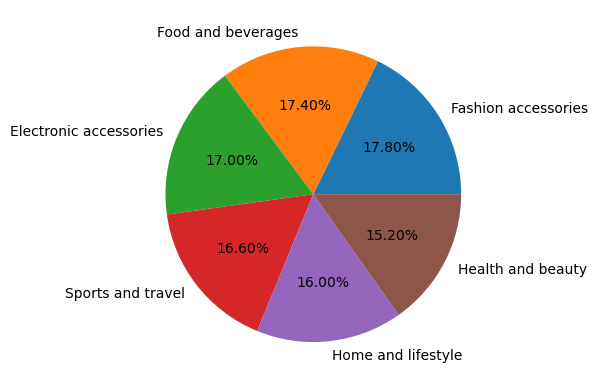

In [313]:
plt.pie(df["Product line"].value_counts(),autopct="%0.2f%%",labels=['Fashion accessories','Food and beverages','Electronic accessories','Sports and travel','Home and lifestyle','Health and beauty'])
plt.show()

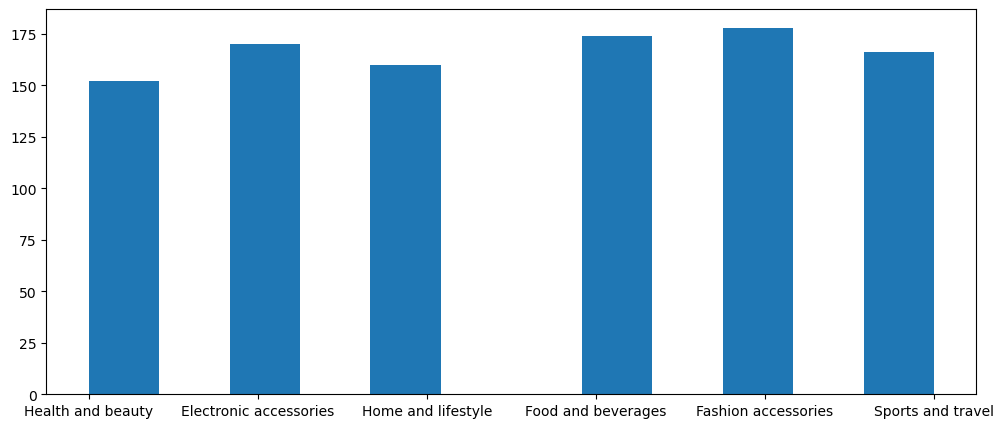

In [315]:
plt.figure(figsize=(12,5))
plt.hist(df['Product line'],bins=12)
plt.show()

In [317]:
df.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


In [319]:
df['Tax 5%'] = (df['Unit price'] * df['Quantity'])/20

In [321]:
df['Total Price'] = (df['Unit price'] * df['Quantity']) + df['Tax 5%']

In [323]:
df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total Price
0,Female,A,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715
1,Female,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200
2,Female,A,Yangon,Member,Electronic accessories,68.84,6,20.6520,433.6920
3,Female,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800,772.3800
4,Female,A,Yangon,Member,Health and beauty,36.26,2,3.6260,76.1460
...,...,...,...,...,...,...,...,...,...
995,Male,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030,121.8630
996,Male,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450,183.6450
997,Male,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175,42.3675
998,Male,A,Yangon,Member,Food and beverages,31.84,1,1.5920,33.4320


In [325]:
df.describe()

,Unit price,Quantity,Tax 5%,Total Price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749
std,26.494628,2.923431,11.708825,245.885335
min,10.080000,1.000000,0.508500,10.678500
25%,32.875000,3.000000,5.924875,124.422375
50%,55.230000,5.000000,12.088000,253.848000
75%,77.935000,8.000000,22.445250,471.350250
max,99.960000,10.000000,49.650000,1042.650000


In [327]:
df = df[df['Total Price']<600]

In [329]:
df = df.reset_index()
df.drop(columns=['index'],inplace=True)

In [331]:
df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total Price
0,Female,A,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715
1,Female,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200
2,Female,A,Yangon,Member,Electronic accessories,68.84,6,20.6520,433.6920
3,Female,A,Yangon,Member,Health and beauty,36.26,2,3.6260,76.1460
4,Female,B,Mandalay,Member,Food and beverages,54.84,3,8.2260,172.7460
...,...,...,...,...,...,...,...,...,...
835,Male,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030,121.8630
836,Male,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450,183.6450
837,Male,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175,42.3675
838,Male,A,Yangon,Member,Food and beverages,31.84,1,1.5920,33.4320


In [333]:
grp = df.groupby('Gender')

In [335]:
grp.max()

,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total Price
Gender,,,,,,,,
Female,C,Yangon,Normal,Sports and travel,99.69,10,28.4200,596.8200
Male,C,Yangon,Normal,Sports and travel,99.89,10,28.4585,597.6285


In [337]:
grp_branch = df.groupby('Branch')

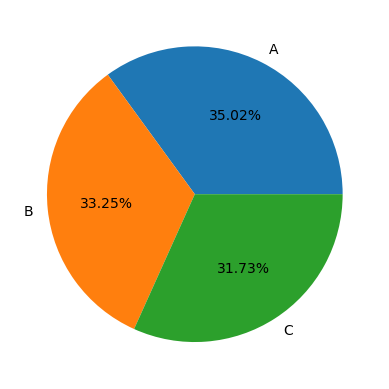

In [339]:
plt.pie(grp_branch.sum()['Total Price'],autopct='%0.2f%%',labels=['A','B','C'])
plt.show()

In [341]:
grp_Product=df.groupby('Product line')

In [343]:
grp_prod_sum = grp_Product.sum()['Quantity']
value = grp_prod_sum.values
value

array([709, 683, 723, 639, 668, 688], dtype=int64)

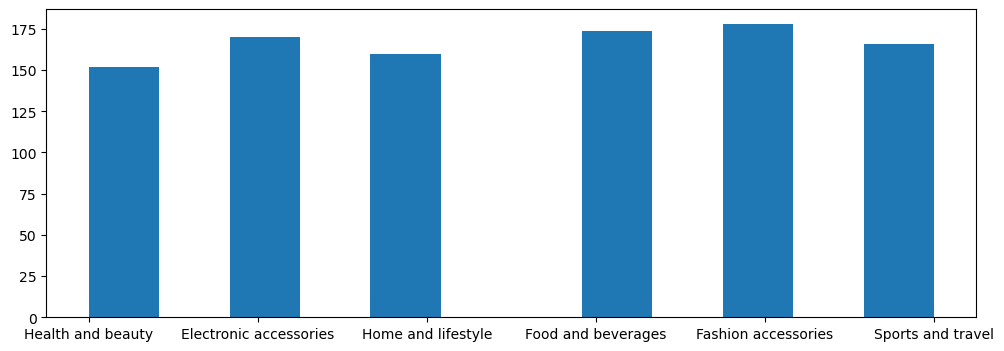

In [16]:
plt.figure(figsize=(12,4))
plt.hist(df['Product line'],bins=12)
plt.show()

In [348]:
df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total Price
0,Female,A,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715
1,Female,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200
2,Female,A,Yangon,Member,Electronic accessories,68.84,6,20.6520,433.6920
3,Female,A,Yangon,Member,Health and beauty,36.26,2,3.6260,76.1460
4,Female,B,Mandalay,Member,Food and beverages,54.84,3,8.2260,172.7460
...,...,...,...,...,...,...,...,...,...
835,Male,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030,121.8630
836,Male,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450,183.6450
837,Male,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175,42.3675
838,Male,A,Yangon,Member,Food and beverages,31.84,1,1.5920,33.4320


In [350]:
ohe = OneHotEncoder(drop='first',sparse_output=False)

In [368]:
l = LabelEncoder()
o = OrdinalEncoder()

In [362]:
df['Gender'] = l.fit_transform(df['Gender'])

In [378]:
df['Branch'] = o.fit_transform(df[['Branch']])
df['Branch'] = df['Branch'].astype(int)

In [380]:
df['City'] = o.fit_transform(df[['City']])
df['City'] = df[['City']].astype(int)

In [384]:
df['Customer type'] = o.fit_transform(df[['Customer type']])
df['Customer type'] = df[['Customer type']].astype(int)

In [386]:
df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total Price
0,0,0,2,0,Health and beauty,74.69,7,26.1415,548.9715
1,0,2,1,1,Electronic accessories,15.28,5,3.8200,80.2200
2,0,0,2,0,Electronic accessories,68.84,6,20.6520,433.6920
3,0,0,2,0,Health and beauty,36.26,2,3.6260,76.1460
4,0,1,0,0,Food and beverages,54.84,3,8.2260,172.7460
...,...,...,...,...,...,...,...,...,...
835,1,0,2,1,Electronic accessories,58.03,2,5.8030,121.8630
836,1,1,0,1,Fashion accessories,17.49,10,8.7450,183.6450
837,1,2,1,1,Health and beauty,40.35,1,2.0175,42.3675
838,1,0,2,0,Food and beverages,31.84,1,1.5920,33.4320


In [388]:
df['Product line'] = o.fit_transform(df[['Product line']])
df['Product line'] = df[['Product line']].astype(int)

In [390]:
df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total Price
0,0,0,2,0,3,74.69,7,26.1415,548.9715
1,0,2,1,1,0,15.28,5,3.8200,80.2200
2,0,0,2,0,0,68.84,6,20.6520,433.6920
3,0,0,2,0,3,36.26,2,3.6260,76.1460
4,0,1,0,0,2,54.84,3,8.2260,172.7460
...,...,...,...,...,...,...,...,...,...
835,1,0,2,1,0,58.03,2,5.8030,121.8630
836,1,1,0,1,1,17.49,10,8.7450,183.6450
837,1,2,1,1,3,40.35,1,2.0175,42.3675
838,1,0,2,0,2,31.84,1,1.5920,33.4320


In [412]:
lin = LinearRegression()

In [400]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['Total Price']),df['Total Price'],test_size=.2)

In [402]:
x_train


,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
619,1,0,2,1,3,25.00,1,1.2500
556,1,0,2,0,0,72.20,7,25.2700
340,0,0,2,0,0,48.62,8,19.4480
719,1,2,1,0,2,55.04,7,19.2640
516,1,0,2,1,2,43.25,2,4.3250
...,...,...,...,...,...,...,...,...
207,0,2,1,0,4,15.95,6,4.7850
474,1,2,1,0,5,34.56,7,12.0960
478,1,1,0,1,5,93.39,6,28.0170
29,0,2,1,1,0,41.65,10,20.8250


In [404]:
x_test

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
111,0,1,0,1,0,14.96,8,5.9840
712,1,0,2,0,1,56.04,10,28.0200
702,1,0,2,0,4,19.36,9,8.7120
136,0,2,1,1,0,51.32,9,23.0940
308,0,1,0,0,4,12.29,9,5.5305
...,...,...,...,...,...,...,...,...
443,1,2,1,1,0,30.61,6,9.1830
568,1,0,2,0,0,36.36,4,7.2720
328,0,2,1,1,3,10.99,5,2.7475
202,0,0,2,0,5,51.52,8,20.6080


In [408]:
y_train

619     26.2500
556    530.6700
340    408.4080
719    404.5440
516     90.8250
         ...   
207    100.4850
474    254.0160
478    588.3570
29     437.3250
69      26.5545
Name: Total Price, Length: 672, dtype: float64

In [414]:
lin.fit(df.drop(columns=['Total Price']),df['Total Price'])

LinearRegression()

In [418]:
y_pred = lin.predict(x_test)

In [420]:
r2_score(y_pred,y_test)

1.0

In [435]:
lin.predict([[1	,0	,2	,0	,1	,56.04,	10	,28.0200]])

C:\Users\kamal suthar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588.42])

In [431]:
y_test

111    125.6640
712    588.4200
702    182.9520
136    484.9740
308    116.1405
         ...   
443    192.8430
568    152.7120
328     57.6975
202    432.7680
751    548.1630
Name: Total Price, Length: 168, dtype: float64